<a href="https://colab.research.google.com/github/lynnido/wrangling/blob/main/Folder/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question: Is price a factor that plays into hotel booking cancellations, and which types of bookings are the most expensive?

In [ ]:
! git clone https://github.com/chaizhang/hotel_booking_cancellations

Cloning into 'hotel_booking_cancellations'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 90 (delta 37), reused 46 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (90/90), 7.98 MiB | 4.99 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data  = pd.read_csv('hotel_booking_cancellations/data/cleaned_hotel_booking.csv')

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116295.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000,116299.000000
mean,0.375988,105.250140,2016.159795,15.793438,27.173278,0.934092,2.515069,3.449161,1.860738,0.105035,0.007807,0.027885,0.087146,0.126467,0.215170,2.300966,103.613414,0.062881,0.574846
std,0.484379,107.165262,0.706848,8.781755,13.519197,0.994956,1.889987,2.529851,0.482390,0.400719,0.096941,0.164644,0.852407,1.453132,0.632961,17.593392,49.153444,0.246022,0.792964
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,8.000000,16.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,16.000000,28.000000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,23.000000,38.000000,2.000000,3.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,31.000000,53.000000,19.000000,50.000000,69.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,...,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015-07-01,2015,July,1,27,0,1,...,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015-07-01,2015,July,1,27,0,1,...,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015-07-01,2015,July,1,27,0,2,...,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015-07-01,2015,July,1,27,0,2,...,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015-07-01,2015,July,1,27,0,2,...,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [ ]:
y = data['is_canceled']
X = data.drop(['is_canceled'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (93039, 29)
Testing set size: (23260, 29)


In [ ]:
print(X_train.dtypes)

categorical_columns = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

hotel                              object
lead_time                           int64
arrival_date                       object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_day_of_month           int64
arrival_date_week_number            int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
stays_total_nights                  int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                     

In [ ]:
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': rf_model.feature_importances_
})

feature_importances.sort_values(by='Coefficient', ascending=False, inplace=True)

print(feature_importances.head(10))


                                Variable  Coefficient
1012        reservation_status_Check-Out          1.0
0                              lead_time          0.0
1280  reservation_status_date_2015-12-06          0.0
1292  reservation_status_date_2015-12-18          0.0
1291  reservation_status_date_2015-12-17          0.0
1290  reservation_status_date_2015-12-16          0.0
1289  reservation_status_date_2015-12-15          0.0
1288  reservation_status_date_2015-12-14          0.0
1287  reservation_status_date_2015-12-13          0.0
1286  reservation_status_date_2015-12-12          0.0


R-squared: 1.00
RMSE: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14478
           1       1.00      1.00      1.00      8782

    accuracy                           1.00     23260
   macro avg       1.00      1.00      1.00     23260
weighted avg       1.00      1.00      1.00     23260


Confusion Matrix:


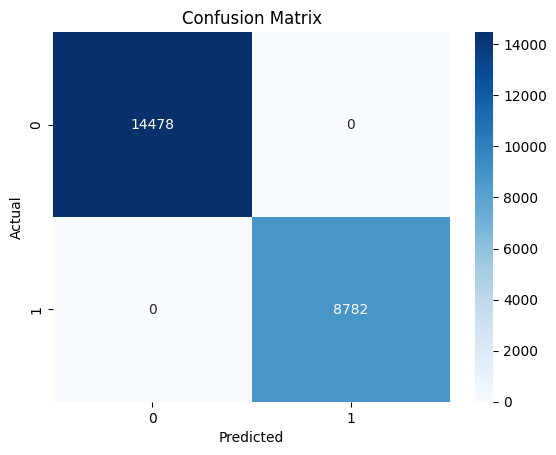

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

accuracy = rf_model.score(X_test, y_test)
print(f"R-squared: {accuracy:.2f}")

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The results of the Random Forest Classifier can indicate that there is some overfitting since the Rsq and RSME values are very high/accurate.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=2, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best:.2f}")

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  24.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  18.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  37.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.4s
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9998280

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

y = data['adr']
X = data.loc[:, ['is_canceled']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=100)
Z_train = pd.get_dummies(X_train['is_canceled'], dtype='int')
Z_test = pd.get_dummies(X_test['is_canceled'], dtype='int')

Z_train.columns = Z_train.columns.astype(str)
Z_test.columns = Z_test.columns.astype(str)
Z_train, Z_test = Z_train.align(Z_test, join='left', axis=1, fill_value=0)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(Z_train, y_train)
y_hat_rf = rf_regressor.predict(Z_test)

rsq_rf = rf_regressor.score(Z_test, y_test)  # R-squared
rmse_rf = np.sqrt(mean_squared_error(y_test, y_hat_rf))  # RMSE

print(f'Rsq: {rsq_rf: }')
print(f'RMSE: {rmse_rf: }')

results = pd.DataFrame({
    'Variable': Z_train.columns,
    'Coefficient': rf_regressor.feature_importances_
})
results


Rsq:  0.0015061028661229603
RMSE:  46.958805360513324


,Variable,Coefficient
0,0,0.86
1,1,0.14


For the Random Forest Regressor the Rsq value is very low which can indicate that the model does not explain the variance in the data. The RSME value is high, which can show that the predictions are not close to the actual values.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

y = data['adr']
X = data[['lead_time', 'adults', 'children', 'previous_cancellations', 'total_of_special_requests', 'is_canceled']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Z_train = pd.concat([
    X_train[['lead_time', 'adults', 'children', 'previous_cancellations', 'total_of_special_requests']],
    pd.get_dummies(X_train['is_canceled'], dtype='int')
], axis=1)

Z_test = pd.concat([
    X_test[['lead_time', 'adults', 'children', 'previous_cancellations', 'total_of_special_requests']],
    pd.get_dummies(X_test['is_canceled'], dtype='int')
], axis=1)

Z_train.columns = Z_train.columns.astype(str)
Z_test.columns = Z_test.columns.astype(str)
Z_train, Z_test = Z_train.align(Z_test, join='left', axis=1, fill_value=0)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(Z_train, y_train)
y_hat_rf = rf_regressor.predict(Z_test)

rsq_rf = rf_regressor.score(Z_test, y_test)  # R-squared
rmse_rf = np.sqrt(mean_squared_error(y_test, y_hat_rf))  # RMSE

print(f'Rsq: {rsq_rf: }')
print(f'RMSE: {rmse_rf: }')

results = pd.DataFrame({
    'Variable': Z_train.columns,
    'Coefficient': rf_regressor.feature_importances_
})
results


Rsq:  0.2823647599270991
RMSE:  39.81036972354735


,Variable,Coefficient
0,lead_time,0.357817
1,adults,0.224570
2,children,0.275430
3,previous_cancellations,0.016348
4,total_of_special_requests,0.083440
5,0,0.029651
6,1,0.012744


RSME value is better, a bit lower than the previous. The most important features for predicting the target is lead_time, children, and adults.